In [46]:
#install.packages('TTR')
#install.packages('matrixStats')
#install.packages('StanHeaders')
#install.packages('extraDistr')
#install.packages('rstan')
#install.packages('prophet')
#install.packages('Rtools')

In [3]:
maybank.raw.data = read.csv('Maybank for R Group.csv')
str(maybank.raw.data)

'data.frame':	2455 obs. of  9 variables:
 $ X            : Factor w/ 5 levels "Fr","Mo","Th",..: 1 3 5 4 1 3 5 4 2 1 ...
 $ DATE         : Factor w/ 2455 levels "1/10/2009","1/10/2010",..: 1716 1635 1552 1473 1152 1071 988 827 740 499 ...
 $ OPEN.Px      : num  9.56 9.56 9.46 9.49 9.48 9.5 9.46 9.5 9.5 9.45 ...
 $ LAST.Px      : num  9.8 9.56 9.55 9.47 9.48 9.48 9.5 9.49 9.5 9.54 ...
 $ HIGH.Px      : num  9.8 9.63 9.55 9.5 9.5 9.5 9.52 9.5 9.53 9.68 ...
 $ LOW.Px       : num  9.53 9.51 9.46 9.43 9.46 9.41 9.45 9.44 9.42 9.42 ...
 $ VOLUME       : Factor w/ 2290 levels "1.076M","1.083M",..: 162 1283 272 2130 1714 1313 521 520 1242 392 ...
 $ DAILY.RETURN : Factor w/ 1749 levels "-0.001","-0.001001001",..: 1683 882 1424 28 856 147 884 26 323 1277 ...
 $ ANNUAL.RETURN: Factor w/ 2137 levels "-0.000184632",..: 205 216 295 286 286 266 277 267 228 279 ...


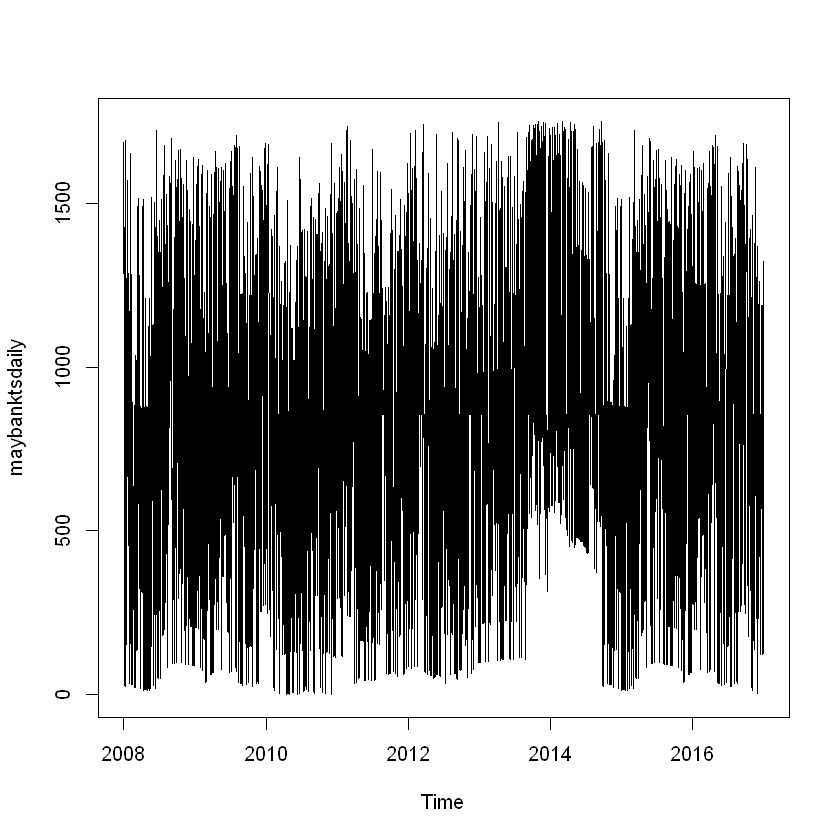

In [4]:
maybanktsdaily = ts(maybank.raw.data[,8],frequency=365,start=c(2008,1),end=c(2017))
plot.ts(maybanktsdaily)

In [40]:
#Extract data for prophet

ds = as.Date(maybank.raw.data$DATE, format="%d/%m/%Y")
y = maybank.raw.data$DAILY.RETURN
maybank.data = data.frame(ds,y)
str(maybank.data)

'data.frame':	2455 obs. of  2 variables:
 $ ds: Date, format: "2017-12-29" "2017-12-28" ...
 $ y : num  0.24 0 0.09 -0.02 0 -0.02 0.04 -0.01 0 0.09 ...


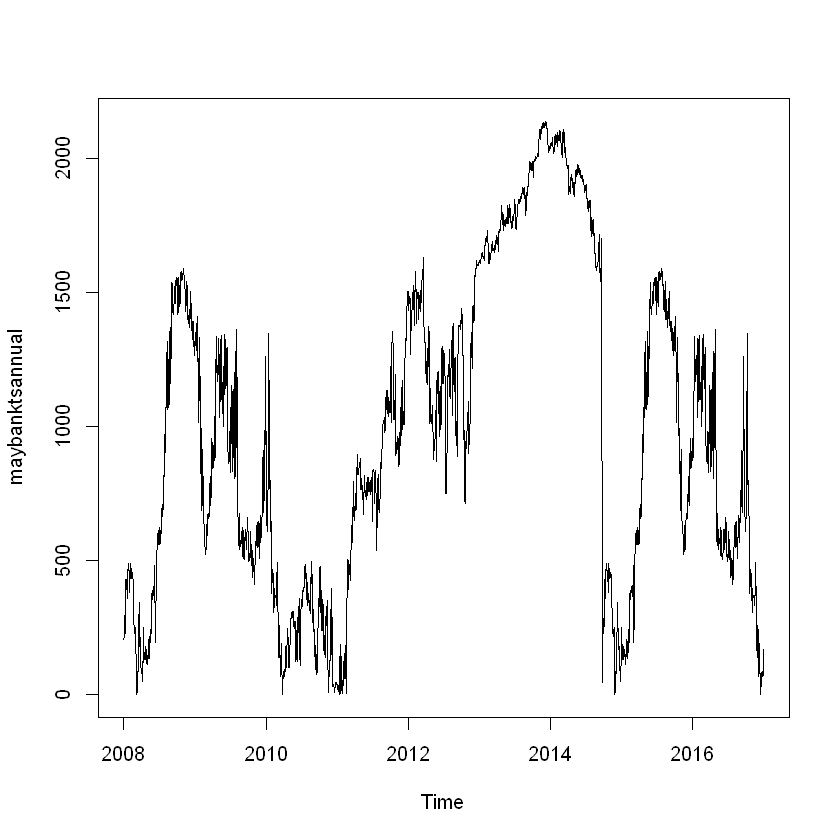

In [5]:
maybanktsannual=ts(maybank.raw.data[,9],frequency=365,start=c(2008,1), end=c(2017))
plot.ts(maybanktsannual)

USING FB PROPHET


In [9]:
library(prophet)

#Daily Data
ds = as.Date(maybank.raw.data$DATE, format="%d/%m/%Y")
y = maybank.raw.data$DAILY.RETURN
maybank.daily = data.frame(ds,y)
str(maybank.daily)

'data.frame':	2455 obs. of  2 variables:
 $ ds: Date, format: "2017-12-29" "2017-12-28" ...
 $ y : Factor w/ 1749 levels "-0.001","-0.001001001",..: 1683 882 1424 28 856 147 884 26 323 1277 ...


Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.



,ds
,<dttm>
2815,2018-12-24
2816,2018-12-25
2817,2018-12-26
2818,2018-12-27
2819,2018-12-28
2820,2018-12-29


In [48]:
m <- prophet(maybank.daily)
future.daily <- make_future_dataframe(m, periods = 365)
tail(future.daily)

,ds,yhat,yhat_lower,yhat_upper
,<dttm>,<dbl>,<dbl>,<dbl>
2815,2018-12-24,0.01863817,-0.09079930,0.11864253
2816,2018-12-25,0.02297936,-0.07374153,0.12545857
2817,2018-12-26,0.01540652,-0.08319845,0.11557796
2818,2018-12-27,0.02502485,-0.07760691,0.12769646
2819,2018-12-28,0.02738846,-0.07557810,0.12794597
2820,2018-12-29,-0.05838594,-0.15708077,0.03391347


In [10]:
#Annual Data
#ds use as before
y = maybank.raw.data$ANNUAL.RETURN
maybank.annual = data.frame(ds,y)
str(maybank.annual)

'data.frame':	2455 obs. of  2 variables:
 $ ds: Date, format: "2017-12-29" "2017-12-28" ...
 $ y : Factor w/ 2137 levels "-0.000184632",..: 205 216 295 286 286 266 277 267 228 279 ...


Disabling daily seasonality. Run prophet with daily.seasonality=TRUE to override this.



,ds
,<dttm>
2815,2018-12-24
2816,2018-12-25
2817,2018-12-26
2818,2018-12-27
2819,2018-12-28
2820,2018-12-29


In [ ]:
n <- prophet(maybank.annual)
future.annual <- make_future_dataframe(n, periods = 365)
tail(future.annual)

In [12]:
forecast.m <- predict(m, future.daily)
tail(forecast.m[c('ds', 'yhat', 'yhat_lower', 'yhat_upper')])

,ds,yhat,yhat_lower,yhat_upper
,<dttm>,<dbl>,<dbl>,<dbl>
2815,2018-12-24,864.3443,233.5060,1435.082
2816,2018-12-25,908.2179,296.4673,1498.104
2817,2018-12-26,857.1416,298.9098,1452.439
2818,2018-12-27,883.7098,229.9044,1498.538
2819,2018-12-28,918.2298,332.3349,1537.619
2820,2018-12-29,805.5435,194.5424,1414.349


In [13]:
forecast.n <- predict(n, future.annual)
tail(forecast.n[c('ds', 'yhat', 'yhat_lower', 'yhat_upper')])

,ds,yhat,yhat_lower,yhat_upper
,<dttm>,<dbl>,<dbl>,<dbl>
2815,2018-12-24,68.13323,-311.4823,434.2306
2816,2018-12-25,68.70236,-292.6995,426.2476
2817,2018-12-26,58.52065,-359.9877,399.0210
2818,2018-12-27,57.81625,-309.1906,435.6076
2819,2018-12-28,53.13839,-330.2356,415.2322
2820,2018-12-29,-952.38951,-1314.0156,-601.9517


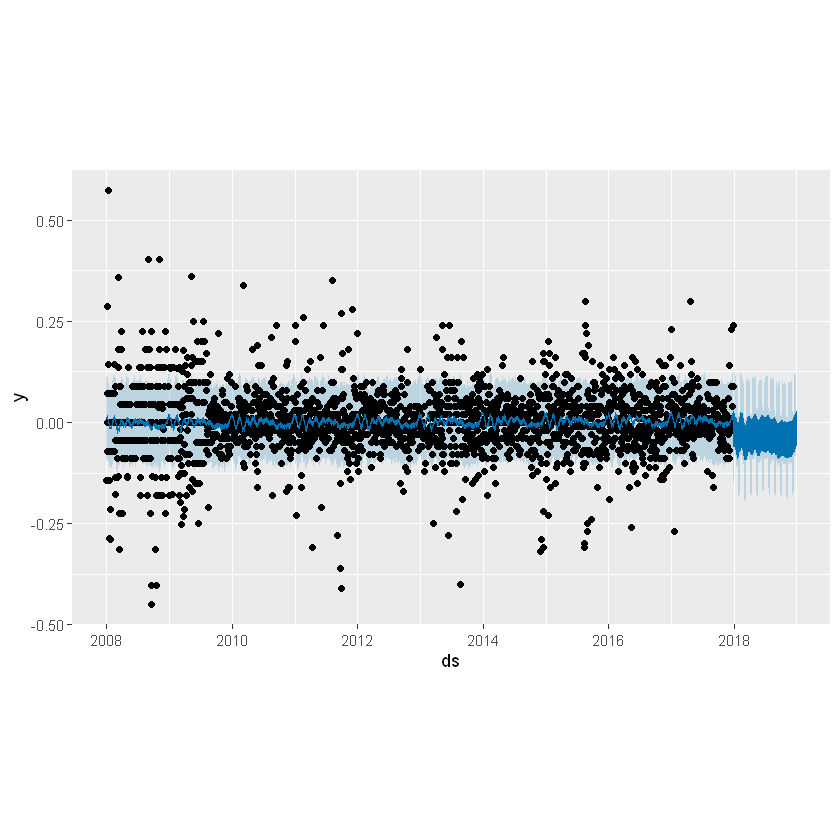

In [49]:
#FBprophet time series analysis for Daily return
plot(m, forecast.m)

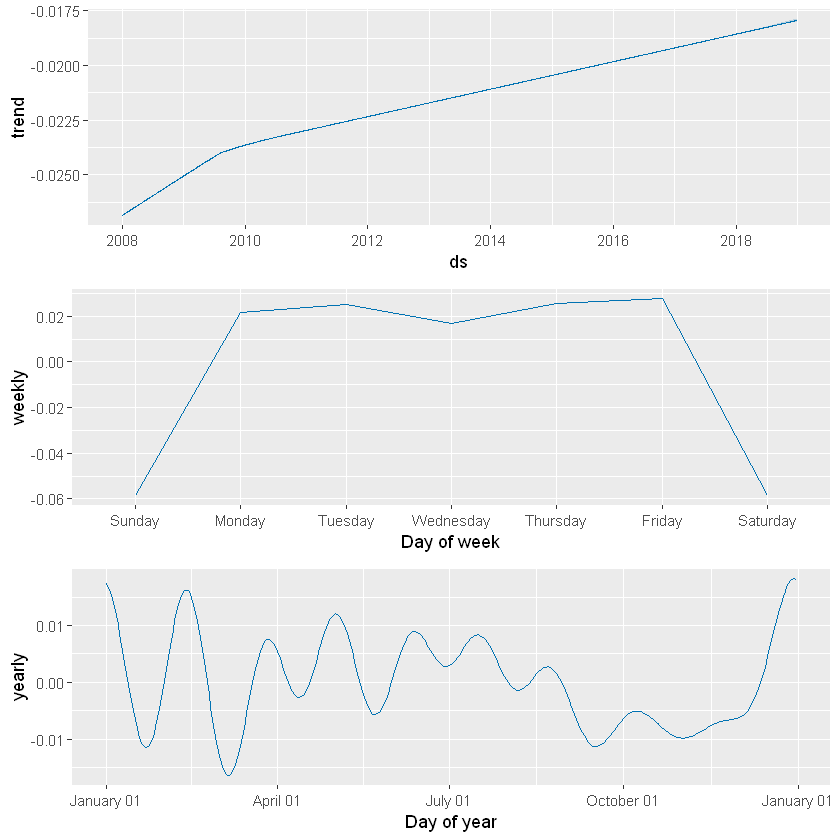

In [50]:
prophet_plot_components(m, forecast)

In [45]:
dyplot.prophet(m, forecast)

HTML widgets cannot be represented in plain text (need html)